## Environment Variables

In [1]:
FASTTEXT_BIN_FILENAME = "../../data/fasttext_wiki.simple/wiki.simple" # No extension
AGENDAS_FILE = "../agendas"

## Load FastText word vectors

In [2]:
from gensim.models.fasttext import FastText 
ft_vectors = FastText.load_fasttext_format(FASTTEXT_BIN_FILENAME)

## Compute tag vectors

In [3]:
tag_list = [
  "Community",
  "Learning",
  "Health",
  "Economic opportunity",
  "Responsive government",
  "Environment",
  "Sustainability",
  "Public Safety",
  "Parks & Recreation",
  "Free Speech",
  "Housing",
  "Mobility",
  "Pets",
  "Zoning",
  "Infrastructure",
  "Sanitation",
]
tag_vectors = [ft_vectors[tag] for tag in tag_list]

import numpy as np
from sklearn.preprocessing import normalize

def normalize_1d(arr):
  return normalize(arr.reshape((-1, 1)), axis=0).reshape(-1)

norm_tag_vectors = [normalize_1d(vector) for vector in tag_vectors]

## Load agendas

In [4]:
import json

agenda_items = []
with open(AGENDAS_FILE) as agendas_file:  
  data = json.load(agendas_file)
  for k in data:
    for item_list in data[k]:
      agenda_items.extend(item_list)

## Plotting and document vector helpers

In [5]:
import matplotlib.pyplot as plt 
import nltk
import re
from sklearn.manifold import TSNE

nltk.download('stopwords')
STOP_WORDS = nltk.corpus.stopwords.words()

def tsne_scatter_plot(vectors, tags, figsize=(20, 10)):
  tsne = TSNE(n_components=2)
  vectors_tsne = tsne.fit_transform(vectors)
  vectors_tsne_x = vectors_tsne[:, 0]
  vectors_tsne_y = vectors_tsne[:, 1]
  
  plt.rcParams["figure.figsize"] = figsize
  plt.scatter(vectors_tsne_x, vectors_tsne_y)
  for i, tag in enumerate(tags):
    plt.annotate(tag, (vectors_tsne_x[i], vectors_tsne_y[i]))
  plt.show()
  
def clean_sentence(ft_vectors, sentence):
  # Returns a list of tokens after lowercasing and removing punctuation + stop words.
  regex = re.compile('([^\s\w]|_)+')
  sentence = regex.sub('', sentence).lower().split()
  return [word for word in sentence if (word not in STOP_WORDS and word in ft_vectors.wv.vocab)]

def doc_vector_simple(word_vectors):
  return np.mean(word_vectors, axis=0)

def doc_vector_simple(word_vectors):
  return np.mean(word_vectors, axis=0)

[nltk_data] Downloading package stopwords to /Users/ylou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##  Plot normalized tag vectors

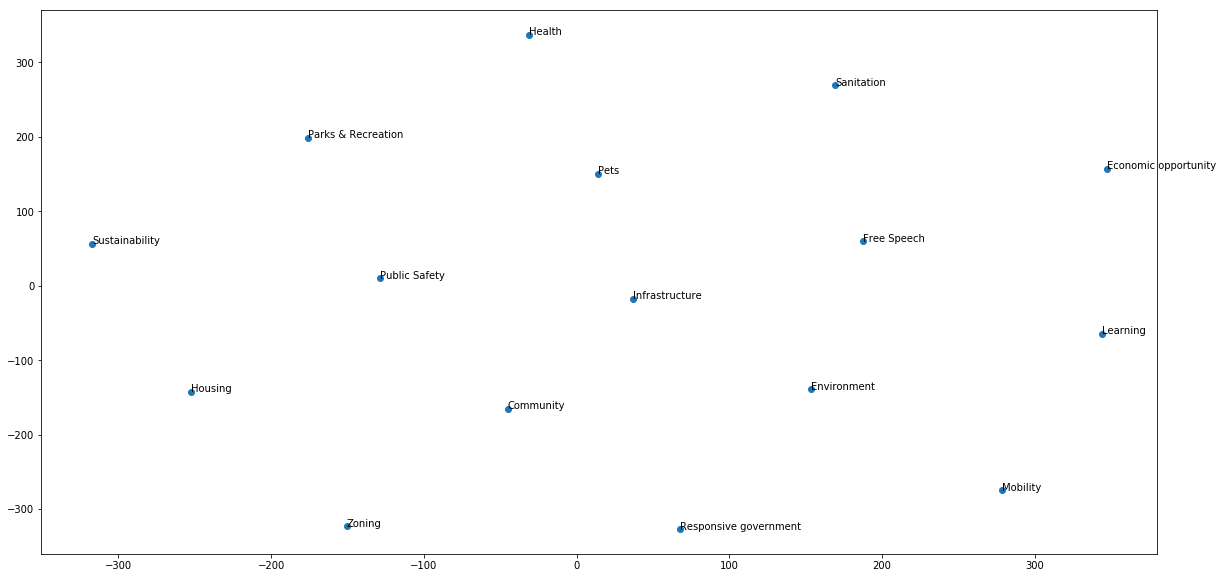

In [6]:
tsne_scatter_plot(norm_tag_vectors, tag_list)

## Plot title document vectors

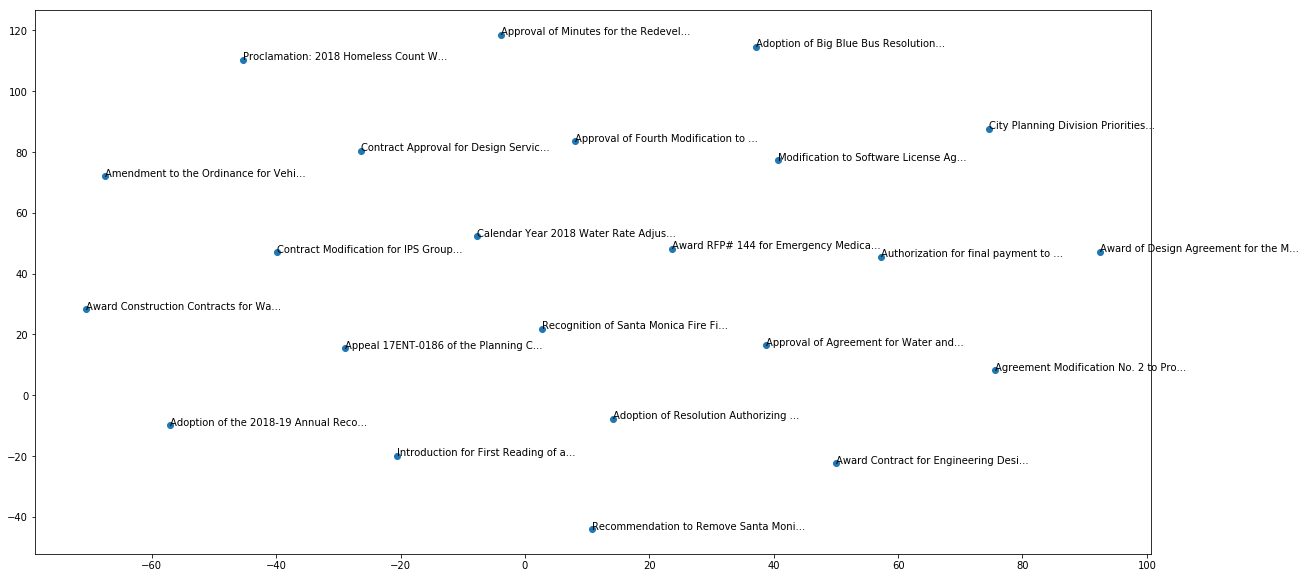

In [7]:
titles = []
title_doc_vectors = []
for item in agenda_items:
  title = item["Title"]
  titles.append(title)
  title_word_vectors = [normalize_1d(ft_vectors[word]) for word in clean_sentence(ft_vectors, title)]
  title_doc_vectors.append(doc_vector_simple(title_word_vectors))
  
tsne_scatter_plot(title_doc_vectors, [title[:35] + "..." for title in titles])

## Plot projections on tag vectors

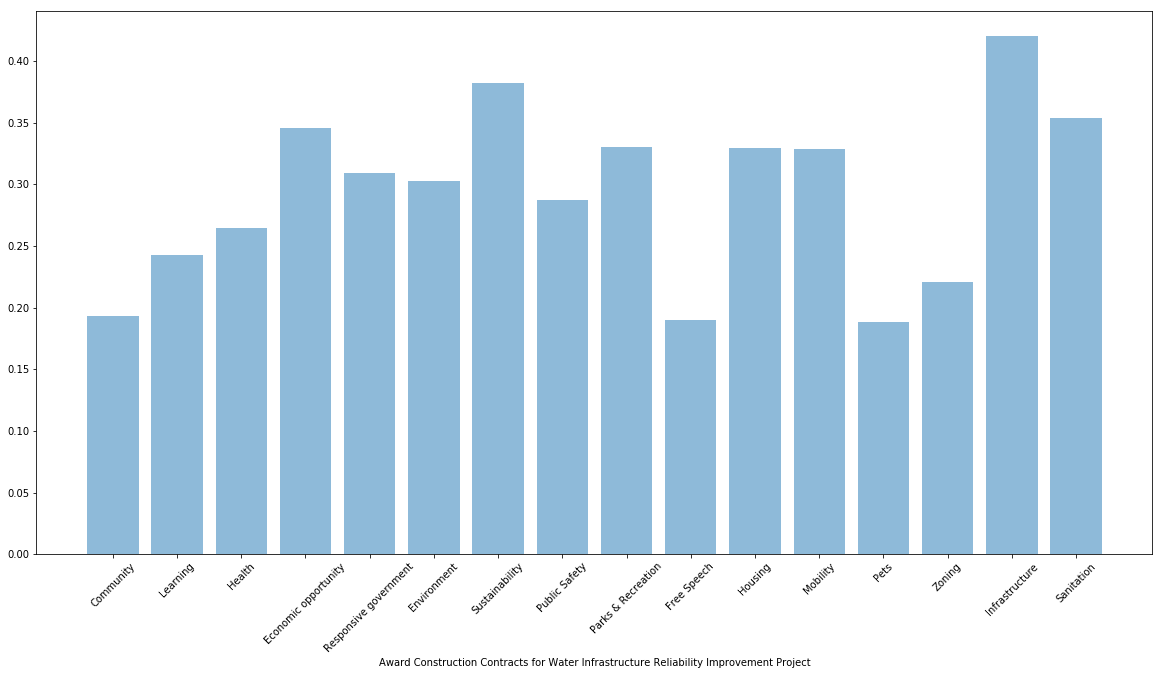

In [10]:
relevancy_vectors = []
for (title, title_doc_vector) in zip(titles, title_doc_vectors):
  f = (np.dot(title_doc_vector, tag_vector) for tag_vector in norm_tag_vectors)
  relevancy_vectors.append(np.fromiter(f, dtype=float))
    
def plot_relevancy_vector(index):
  y_pos = np.arange(len(tag_list))
  plt.bar(y_pos, relevancy_vectors[index], align='center', alpha=0.5)
  plt.xticks(y_pos, tag_list, rotation=45)
  plt.xlabel(titles[index])
  plt.show()
  
plot_relevancy_vector(0)